<a href="https://colab.research.google.com/github/Manideep-0503/RF-drone-detection-using-lstm-model/blob/main/linear_motion_lstm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**2D motion where y varies sinusoidally with time and x varies linearly with time**
<br>
x=velocity * time <br>
y=5sin(2* pi * f * t+phase)

In [2]:
dur=10
samp_rate=100
t=np.linspace(0,dur,int(samp_rate*dur))

In [3]:
x=5*t
y = 5 * np.sin(2 * np.pi * 5 * t + 30)

df = pd.DataFrame({'Time': t, 'X': x, 'Y': y})
df

,Time,X,Y
0,0.00000,0.00000,-4.940158
1,0.01001,0.05005,-4.459327
2,0.02002,0.10010,-3.541119
3,0.03003,0.15015,-2.275593
4,0.04004,0.20020,-0.786873
...,...,...,...
995,9.95996,49.79980,-2.254490
996,9.96997,49.84985,-3.524368
997,9.97998,49.89990,-4.448571
998,9.98999,49.94995,-4.936452


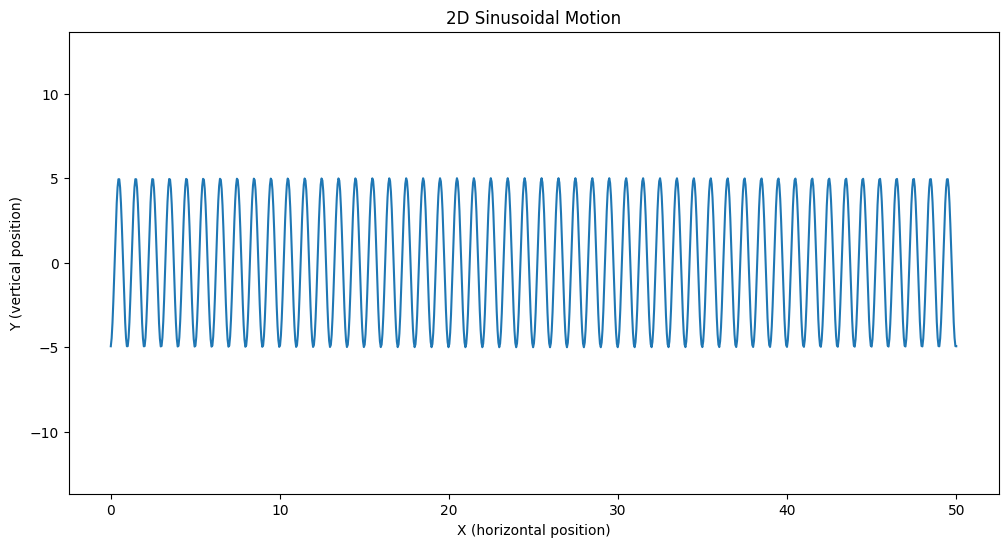

In [4]:
plt.figure(figsize=(12,6))

plt.plot(x, y)
plt.xlabel('X (horizontal position)')
plt.ylabel('Y (vertical position)')
plt.title('2D Sinusoidal Motion')
plt.axis('equal')
plt.show()


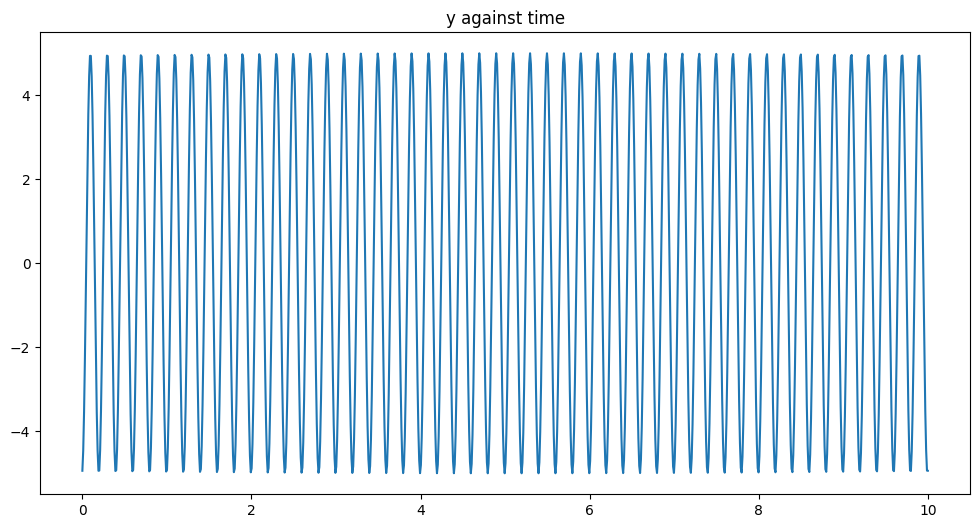

In [5]:
plt.figure(figsize=(12,6))

plt.plot(t,y);
plt.title('y against time')
plt.show()

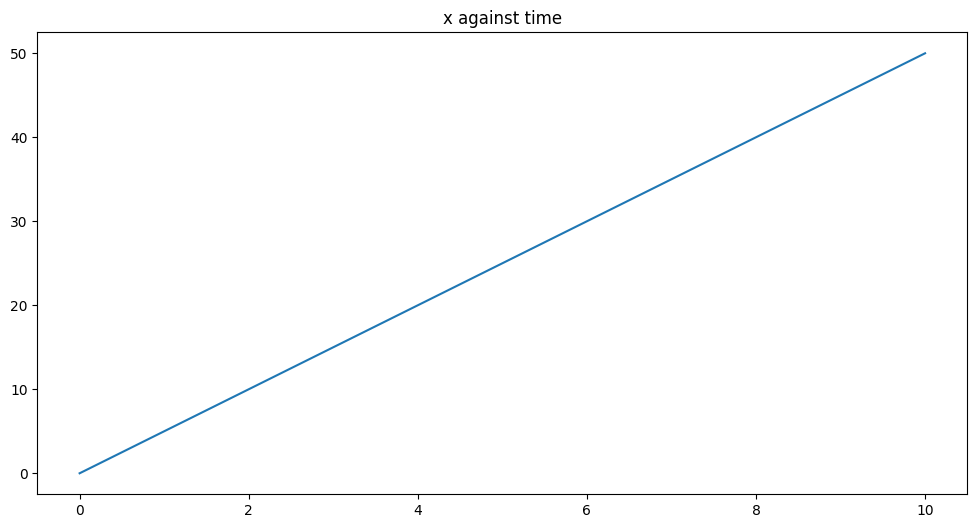

In [6]:
plt.figure(figsize=(12,6))
plt.plot(t,x);
plt.title('x against time')
plt.show()

In [7]:
X_input=df.drop('Time',axis=1)
X_input=np.array(X_input)
X_input

array([[ 0.        , -4.94015812],
       [ 0.05005005, -4.45932701],
       [ 0.1001001 , -3.54111879],
       ...,
       [49.8998999 , -4.44857076],
       [49.94994995, -4.93645152],
       [50.        , -4.94015812]])

**Getting the data ready for the model**<br>
At every time instant we are only predicting the position at next time stamp.
<br>
if for each sample there are 10 timestamps.
<br>Then by using the position at t=0 to t=9 at t=9 model predicts the position at t=10

1.   X_input=[[x0,y0],[x1,y1],[x2,y2]..],<br> [[x1,y1],[x2,y2],[x3,y3]..],  <br>[[x2,y2][,x3,y3],[x4,y4]..],...
2.   Y_output=[x10,y10],   [x11,y11],   [x12,y12]



In [8]:
#X_input=X_input.reshape(100,10,2)
X_input_tmp=[]
Y_output=[]
for i in range(990) :
  x = X_input[i:i+10]
  X_input_tmp.append(x)
  y = X_input[i+10]
  Y_output.append(y)

Y_output=np.array(Y_output)
X_input_tmp=np.array(X_input_tmp)
X_input=X_input_tmp

In [9]:
# Y_output=[]

# for i in range(X_input.shape[0]-1):
#   Y_output.append(X_input[i+1][0])

# Y_output=np.array(Y_output)
# next_time=2*t[len(t)-1]-t[len(t)-2]
# Y_output=np.append(Y_output,[[5*next_time,5 * np.sin(2 * np.pi * 5 * next_time + 30)]],axis=0)

In [10]:
split_index=int(len(X_input) * 0.8)

X_train = X_input[:split_index]
X_test = X_input[split_index:]
y_train = Y_output[:split_index]
y_test = Y_output[split_index:]

**Training the model**
<br> The data is fed into mainly 3 variants of the model.

1.   model1-simple lstm
2.   model2-stacked lstm
3.   model3-bidirectional lstm







In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [12]:
model1 = Sequential()
model1.add(LSTM(50, activation='relu', input_shape=(10, 2)))
model1.add(Dense(2))

model1.compile(optimizer='adam', loss='mse')
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10600     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 10702 (41.80 KB)
Trainable params: 10702 (41.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
history = model1.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
20/20 [==============================] - 4s 72ms/step - loss: 83.5549 - val_loss: 12.5935
Epoch 2/1000
20/20 [==============================] - 0s 22ms/step - loss: 6.1563 - val_loss: 8.0935
Epoch 3/1000
20/20 [==============================] - 0s 22ms/step - loss: 1.9238 - val_loss: 2.8274
Epoch 4/1000
20/20 [==============================] - 0s 25ms/step - loss: 0.7075 - val_loss: 1.5376
Epoch 5/1000
20/20 [==============================] - 0s 21ms/step - loss: 0.2347 - val_loss: 0.9011
Epoch 6/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.1172 - val_loss: 0.7891
Epoch 7/1000
20/20 [==============================] - 0s 21ms/step - loss: 0.0722 - val_loss: 0.5467
Epoch 8/1000
20/20 [==============================] - 0s 20ms/step - loss: 0.0397 - val_loss: 0.2200
Epoch 9/1000
20/20 [==============================] - 0s 16ms/step - loss: 0.0287 - val_loss: 0.2593
Epoch 10/1000
20/20 [==============================] - 0s 18ms/step - loss: 0.0229 - val_

In [14]:
test_predictions = model1.predict(X_test)
test_predictions

7/7 [==============================] - 0s 3ms/step


array([[40.118286  , -2.514143  ],
       [40.136707  , -1.0892104 ],
       [40.141296  ,  0.4876553 ],
       [40.195465  ,  2.0350502 ],
       [40.270176  ,  3.3612037 ],
       [40.323353  ,  4.312973  ],
       [40.39248   ,  4.8488207 ],
       [40.469654  ,  4.925897  ],
       [40.547474  ,  4.5614853 ],
       [40.66185   ,  3.7251632 ],
       [40.753628  ,  2.530589  ],
       [40.805145  ,  1.0821794 ],
       [40.818386  , -0.47400007],
       [40.860306  , -1.9962708 ],
       [40.894424  , -3.3068447 ],
       [40.917366  , -4.2793555 ],
       [40.9143    , -4.8148384 ],
       [40.921844  , -4.859337  ],
       [40.984634  , -4.500749  ],
       [41.07245   , -3.6583772 ],
       [41.132298  , -2.4767652 ],
       [41.148315  , -1.0478343 ],
       [41.154648  ,  0.52037513],
       [41.207535  ,  2.0610693 ],
       [41.28096   ,  3.377445  ],
       [41.334846  ,  4.32006   ],
       [41.406006  ,  4.84805   ],
       [41.48694   ,  4.9203167 ],
       [41.569683  ,

In [15]:

test_results_x=[]
test_results_y=[]
actual_x=[]
actual_y=[]
for i in range(y_test.shape[0]):
  test_results_x.append(test_predictions[i][0])
  test_results_y.append(test_predictions[i][1])
  actual_x.append(y_test[i][0])
  actual_y.append(y_test[i][1])

Text(0.5, 1.0, 'motion_pred in x direction')

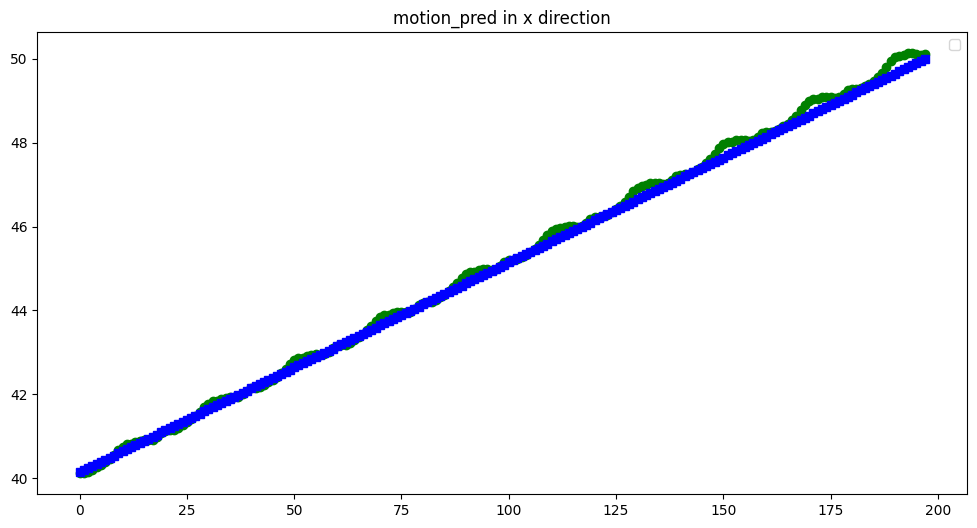

In [16]:
#motion in x direction
plt.figure(figsize=(12, 6))
plt.plot(test_results_x,color='green',marker='o')
plt.plot(actual_x,color='blue',marker='s')
plt.legend()
plt.title('motion_pred in x direction')

Text(0.5, 1.0, 'motion_pred in y direction')

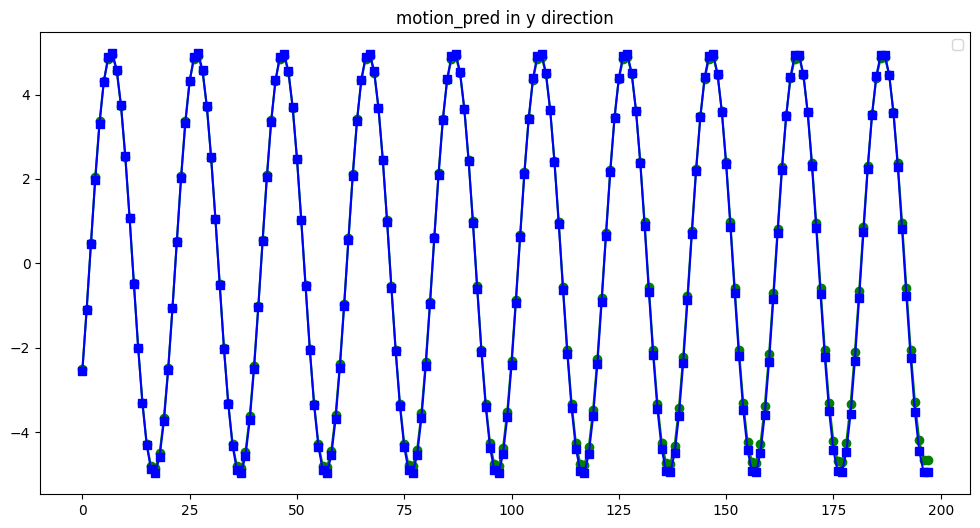

In [17]:
#motion in y direction
plt.figure(figsize=(12, 6))
plt.plot(test_results_y,color='green',marker='o')
plt.plot(actual_y,color='blue',marker='s')
plt.legend()
plt.title('motion_pred in y direction')

Text(0.5, 1.0, '2d picture of actual and predicted motion')

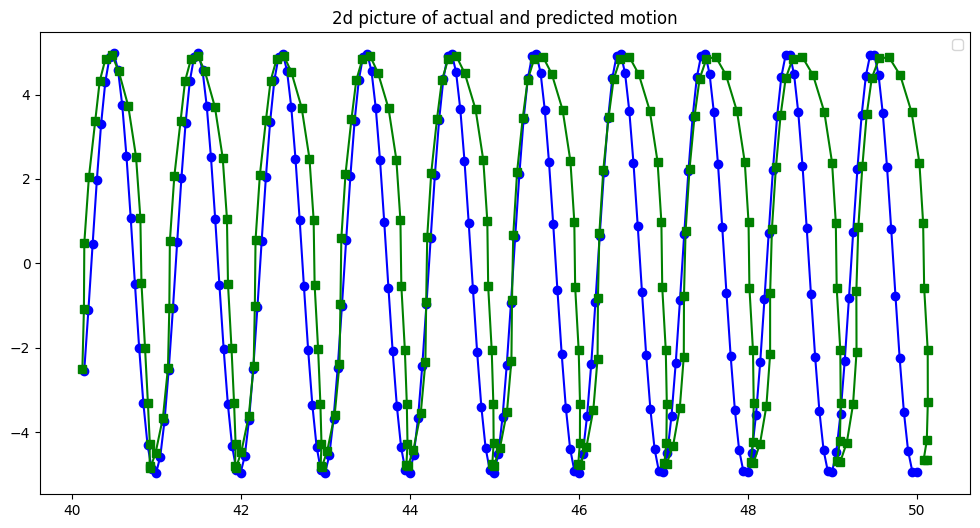

In [18]:
#2d picture of actual and predicted motion
plt.figure(figsize=(12, 6))
plt.plot(actual_x,actual_y,color='blue',marker='o')
plt.plot(test_results_x,test_results_y,color='green',marker='s')
plt.legend()
plt.title('2d picture of actual and predicted motion')

** Understanding the predicted and actual motion**
<br>
Here we can observe that the simple lstm model has done a good job
<br>
But we can observe the offset in the graph. It may be because


1.   Losses in predicting x position variable or
2.   Losses in predicting x position variable
<br> this can be visualised as follows:-



Text(0.5, 1.0, 'losses in x-direction')

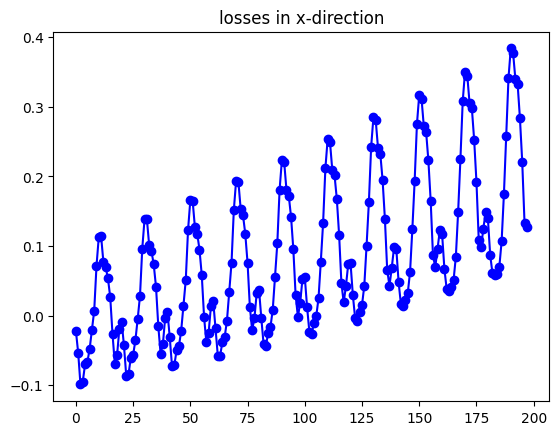

In [19]:
#losses in x-direction
losses_x= []

for i in range(len(y_test)):
    predicted_value = test_results_x[i]
    actual_value = actual_x[i]
    loss = (predicted_value - actual_value)
    losses_x.append(loss)

plt.plot(losses_x,color='blue',marker='o')
plt.title('losses in x-direction')

Text(0.5, 1.0, 'losses in y-direction')

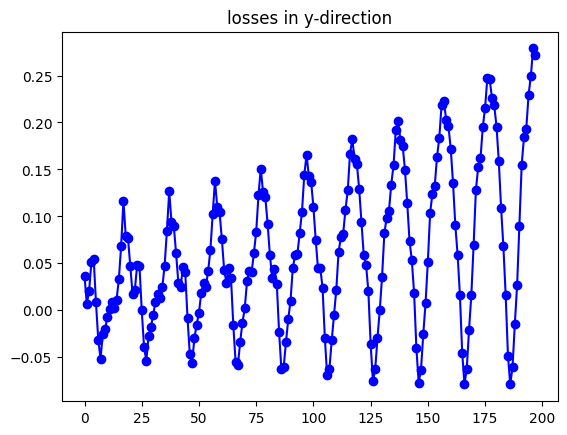

In [20]:
#losses in y-direction
losses_y= []

for i in range(len(y_test)):
    predicted_value = test_results_y[i]
    actual_value = actual_y[i]
    loss = (predicted_value - actual_value)
    losses_y.append(loss)

plt.plot(losses_y,color='blue',marker='o')
plt.title('losses in y-direction')

In [21]:
model2 = Sequential()
model2.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(10, 2)))
model2.add(LSTM(100, activation='relu', return_sequences=True))
model2.add(LSTM(50, activation='relu', return_sequences=True))
model2.add(LSTM(25, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(2))

model2.compile(optimizer='adam', loss='mse')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10, 200)           162400    
                                                                 
 lstm_2 (LSTM)               (None, 10, 100)           120400    
                                                                 
 lstm_3 (LSTM)               (None, 10, 50)            30200     
                                                                 
 lstm_4 (LSTM)               (None, 25)                7600      
                                                                 
 dense_1 (Dense)             (None, 20)                520       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 2)                

In [22]:
history = model2.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
20/20 [==============================] - 7s 80ms/step - loss: 58.2258 - val_loss: 19.9143
Epoch 2/1000
20/20 [==============================] - 1s 46ms/step - loss: 7.3365 - val_loss: 7.5555
Epoch 3/1000
20/20 [==============================] - 1s 47ms/step - loss: 5.4404 - val_loss: 2.4302
Epoch 4/1000
20/20 [==============================] - 1s 47ms/step - loss: 2.7711 - val_loss: 3.2524
Epoch 5/1000
20/20 [==============================] - 1s 51ms/step - loss: 1.4075 - val_loss: 4.9802
Epoch 6/1000
20/20 [==============================] - 2s 91ms/step - loss: 0.6517 - val_loss: 0.7822
Epoch 7/1000
20/20 [==============================] - 1s 53ms/step - loss: 0.3137 - val_loss: 0.4599
Epoch 8/1000
20/20 [==============================] - 1s 50ms/step - loss: 0.1579 - val_loss: 0.4384
Epoch 9/1000
20/20 [==============================] - 1s 46ms/step - loss: 0.0545 - val_loss: 0.4387
Epoch 10/1000
20/20 [==============================] - 1s 46ms/step - loss: 0.0553 - val_

In [23]:
test_predictions = model2.predict(X_test)
test_predictions

7/7 [==============================] - 1s 12ms/step


array([[40.086708  , -2.5091295 ],
       [39.982975  , -1.0441979 ],
       [40.007225  ,  0.5993587 ],
       [40.054157  ,  2.0964994 ],
       [40.07713   ,  3.247346  ],
       [40.158054  ,  4.271556  ],
       [40.21653   ,  4.752549  ],
       [40.263718  ,  4.8374453 ],
       [40.290215  ,  4.540715  ],
       [40.29647   ,  3.6443405 ],
       [40.32227   ,  2.456874  ],
       [40.41165   ,  1.1430341 ],
       [40.468277  , -0.46866214],
       [40.677357  , -1.9830674 ],
       [40.753204  , -3.2667856 ],
       [40.800346  , -4.2199116 ],
       [40.835243  , -4.789751  ],
       [40.87322   , -4.871154  ],
       [40.922478  , -4.448202  ],
       [40.975685  , -3.6629133 ],
       [41.080498  , -2.4773054 ],
       [40.952194  , -1.0119199 ],
       [40.97631   ,  0.6448785 ],
       [41.023014  ,  2.1270618 ],
       [41.037514  ,  3.2393293 ],
       [41.121277  ,  4.257827  ],
       [41.182316  ,  4.768611  ],
       [41.22503   ,  4.835205  ],
       [41.249725  ,

In [24]:

test_results_x=[]
test_results_y=[]
actual_x=[]
actual_y=[]
for i in range(y_test.shape[0]):
  test_results_x.append(test_predictions[i][0])
  test_results_y.append(test_predictions[i][1])
  actual_x.append(y_test[i][0])
  actual_y.append(y_test[i][1])

Text(0.5, 1.0, 'motion_pred in x direction')

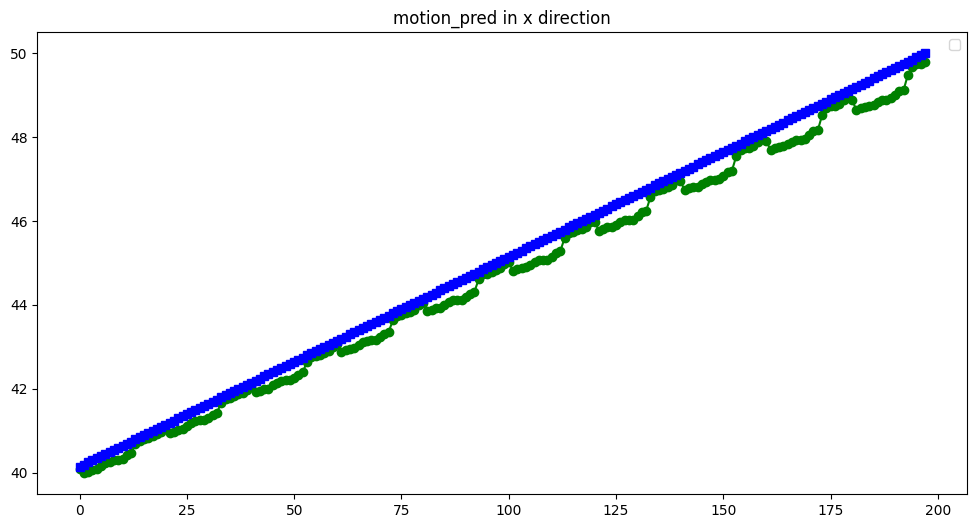

In [25]:
#motion in x direction
plt.figure(figsize=(12, 6))
plt.plot(test_results_x,color='green',marker='o')
plt.plot(actual_x,color='blue',marker='s')
plt.legend()
plt.title('motion_pred in x direction')

Text(0.5, 1.0, 'motion_pred in y direction')

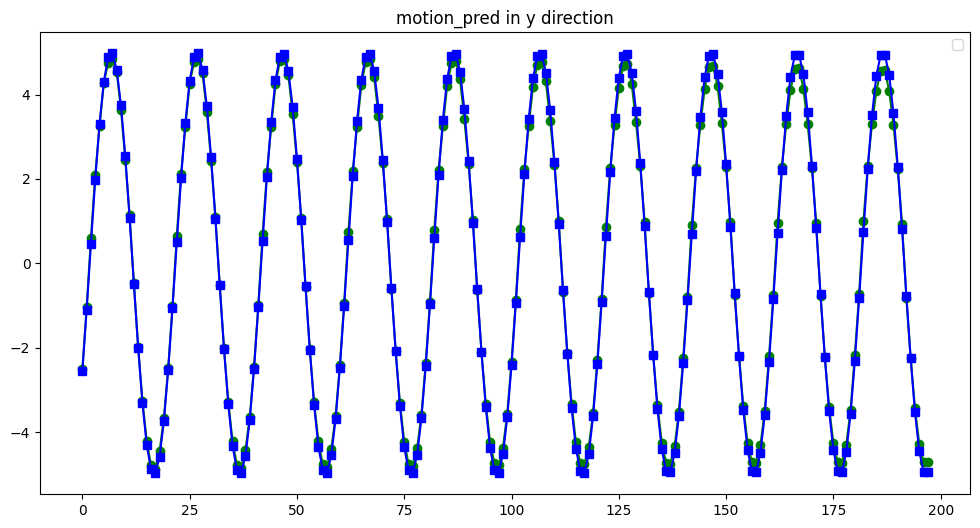

In [26]:
#motion in y direction
plt.figure(figsize=(12, 6))
plt.plot(test_results_y,color='green',marker='o')
plt.plot(actual_y,color='blue',marker='s')
plt.legend()
plt.title('motion_pred in y direction')

Text(0.5, 1.0, '2d picture of actual and predicted motion')

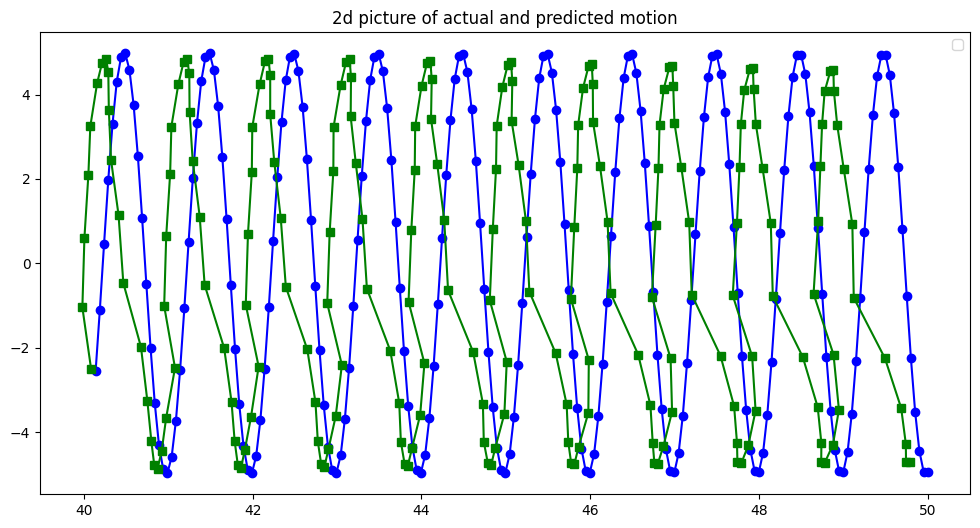

In [27]:
#2d picture of actual and predicted motion
plt.figure(figsize=(12, 6))
plt.plot(actual_x,actual_y,color='blue',marker='o')
plt.plot(test_results_x,test_results_y,color='green',marker='s')
plt.legend()
plt.title('2d picture of actual and predicted motion')

Text(0.5, 1.0, 'losses in x-direction')

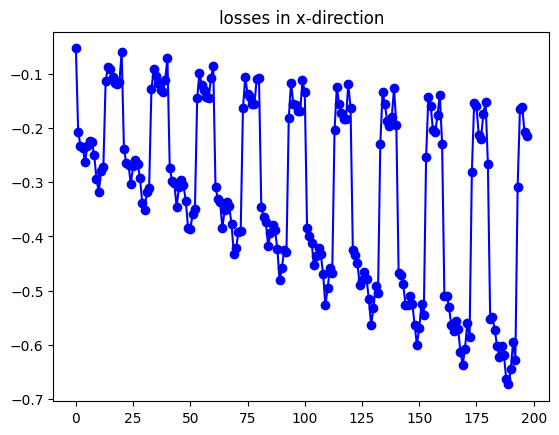

In [28]:
#losses in x-direction
losses_x= []

for i in range(len(y_test)):
    predicted_value = test_results_x[i]
    actual_value = actual_x[i]
    loss = (predicted_value - actual_value)
    losses_x.append(loss)

plt.plot(losses_x,color='blue',marker='o')
plt.title('losses in x-direction')

Text(0.5, 1.0, 'losses in y-direction')

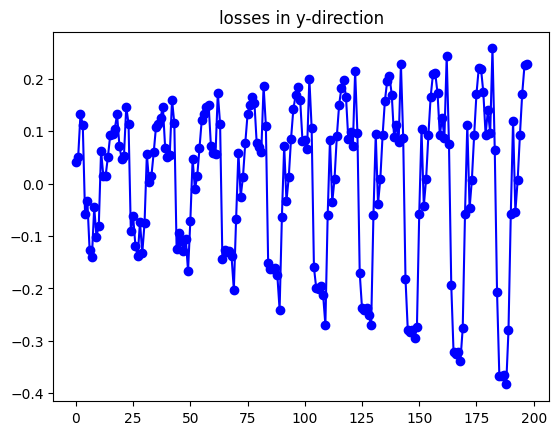

In [29]:
#losses in y-direction
losses_y= []

for i in range(len(y_test)):
    predicted_value = test_results_y[i]
    actual_value = actual_y[i]
    loss = (predicted_value - actual_value)
    losses_y.append(loss)

plt.plot(losses_y,color='blue',marker='o')
plt.title('losses in y-direction')

In [30]:
from keras.layers import Bidirectional

model3 = Sequential()
model3.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(10, 2)))
model3.add(Dense(2))

model3.compile(optimizer='adam', loss='mse')
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 100)               21200     
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 2)                 202       
                                                                 
Total params: 21402 (83.60 KB)
Trainable params: 21402 (83.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
history = model3.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
20/20 [==============================] - 4s 47ms/step - loss: 121.2270 - val_loss: 87.9033
Epoch 2/1000
20/20 [==============================] - 0s 19ms/step - loss: 4.8562 - val_loss: 2.3166
Epoch 3/1000
20/20 [==============================] - 0s 20ms/step - loss: 0.5984 - val_loss: 2.4763
Epoch 4/1000
20/20 [==============================] - 0s 21ms/step - loss: 0.1548 - val_loss: 0.6861
Epoch 5/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0421 - val_loss: 0.7654
Epoch 6/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0223 - val_loss: 0.7913
Epoch 7/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0143 - val_loss: 0.7311
Epoch 8/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0103 - val_loss: 0.8347
Epoch 9/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0077 - val_loss: 0.7275
Epoch 10/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0058 - val

In [32]:
test_predictions = model3.predict(X_test)
test_predictions

7/7 [==============================] - 0s 5ms/step


array([[40.272804  , -2.5320055 ],
       [40.36835   , -1.0967042 ],
       [40.461483  ,  0.47508118],
       [40.527885  ,  2.0049121 ],
       [40.54963   ,  3.343467  ],
       [40.552937  ,  4.3614373 ],
       [40.55904   ,  4.9573135 ],
       [40.59747   ,  5.057396  ],
       [40.646503  ,  4.657001  ],
       [40.703037  ,  3.8186843 ],
       [40.742256  ,  2.5836937 ],
       [40.796253  ,  1.0662861 ],
       [40.864346  , -0.55625534],
       [40.942356  , -2.100129  ],
       [41.019737  , -3.4225056 ],
       [41.095333  , -4.39854   ],
       [41.158222  , -4.9275064 ],
       [41.184586  , -4.9605856 ],
       [41.18295   , -4.515109  ],
       [41.21931   , -3.6663206 ],
       [41.319244  , -2.4908369 ],
       [41.42736   , -1.0622885 ],
       [41.525555  ,  0.5089929 ],
       [41.588017  ,  2.0379236 ],
       [41.599915  ,  3.3745396 ],
       [41.591526  ,  4.3892465 ],
       [41.591015  ,  4.9785943 ],
       [41.62587   ,  5.0709677 ],
       [41.67058   ,

In [33]:

test_results_x=[]
test_results_y=[]
actual_x=[]
actual_y=[]
for i in range(y_test.shape[0]):
  test_results_x.append(test_predictions[i][0])
  test_results_y.append(test_predictions[i][1])
  actual_x.append(y_test[i][0])
  actual_y.append(y_test[i][1])

Text(0.5, 1.0, 'motion_pred in x direction')

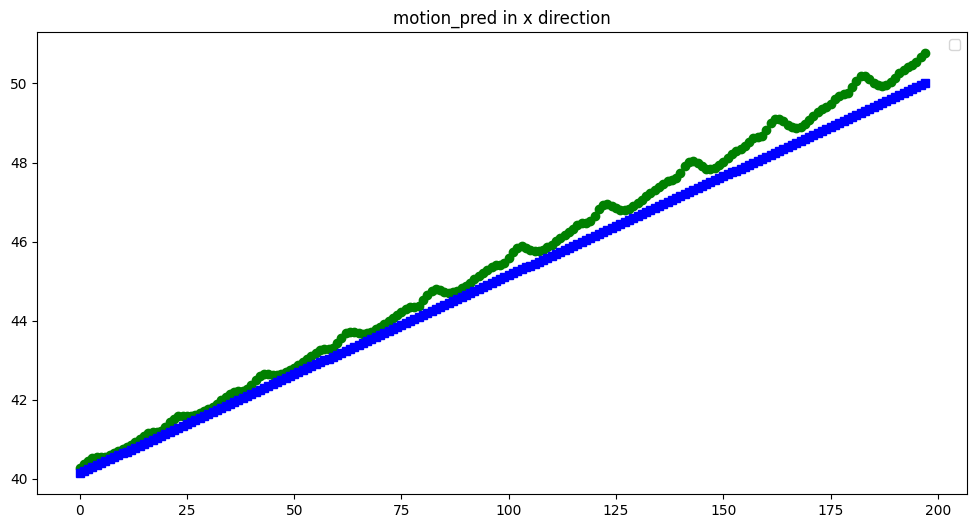

In [34]:
#motion in x direction
plt.figure(figsize=(12, 6))
plt.plot(test_results_x,color='green',marker='o')
plt.plot(actual_x,color='blue',marker='s')
plt.legend()
plt.title('motion_pred in x direction')

Text(0.5, 1.0, 'motion_pred in y direction')

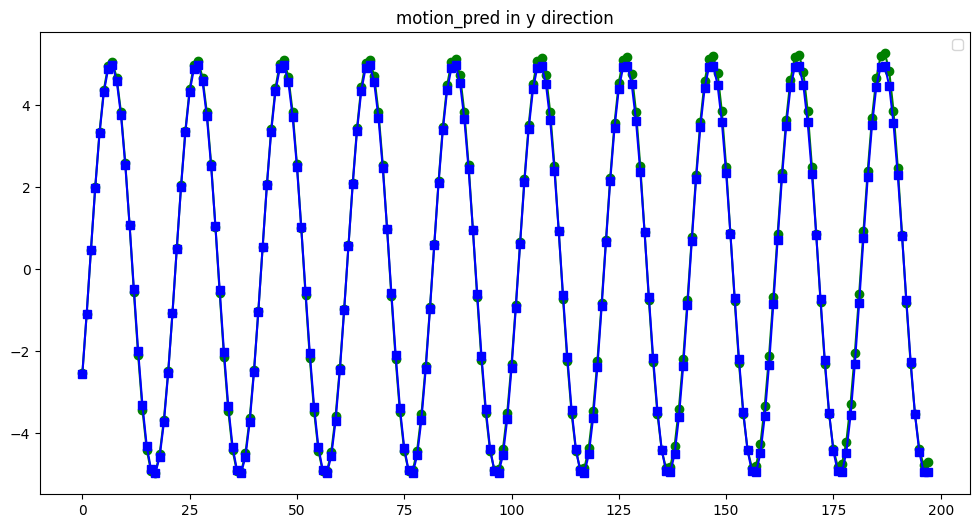

In [35]:
#motion in y direction
plt.figure(figsize=(12, 6))
plt.plot(test_results_y,color='green',marker='o')
plt.plot(actual_y,color='blue',marker='s')
plt.legend()
plt.title('motion_pred in y direction')

Text(0.5, 1.0, '2d picture of actual and predicted motion')

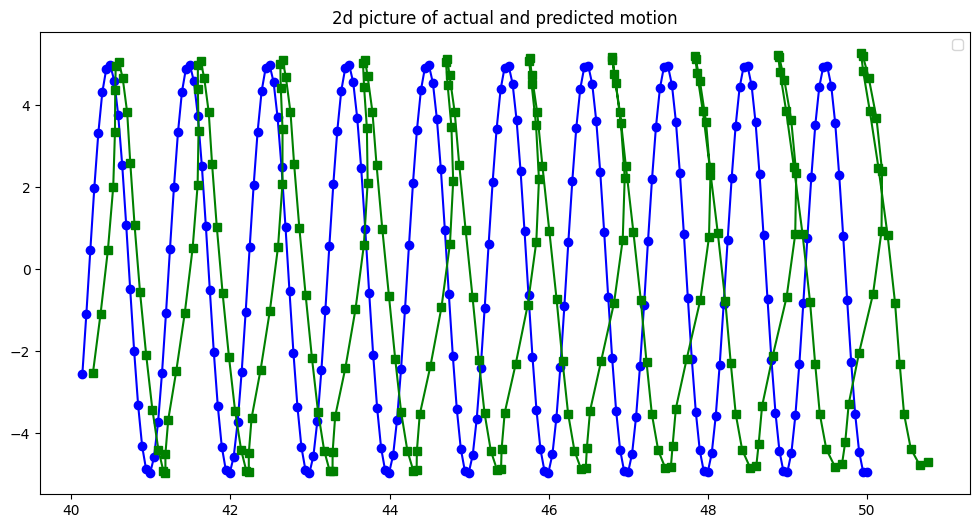

In [36]:
#2d picture of actual and predicted motion
plt.figure(figsize=(12, 6))
plt.plot(actual_x,actual_y,color='blue',marker='o')
plt.plot(test_results_x,test_results_y,color='green',marker='s')
plt.legend()
plt.title('2d picture of actual and predicted motion')

Text(0.5, 1.0, 'losses in x-direction')

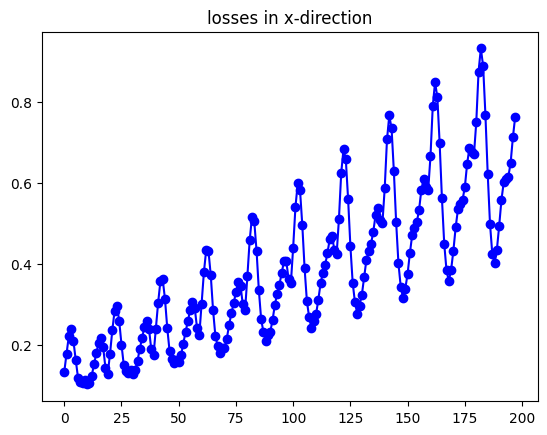

In [37]:
#losses in x-direction
losses_x= []

for i in range(len(y_test)):
    predicted_value = test_results_x[i]
    actual_value = actual_x[i]
    loss = (predicted_value - actual_value)
    losses_x.append(loss)

plt.plot(losses_x,color='blue',marker='o')
plt.title('losses in x-direction')

Text(0.5, 1.0, 'losses in y-direction')

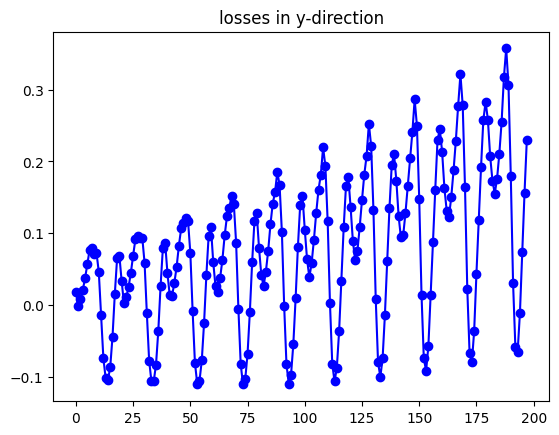

In [38]:
#losses in y-direction
losses_y= []

for i in range(len(y_test)):
    predicted_value = test_results_y[i]
    actual_value = actual_y[i]
    loss = (predicted_value - actual_value)
    losses_y.append(loss)

plt.plot(losses_y,color='blue',marker='o')
plt.title('losses in y-direction')